In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
studio_distribution = studios.group('Studio')

In [5]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [6]:
sum(studio_distribution.column('count'))

200

## Bar Charts ##

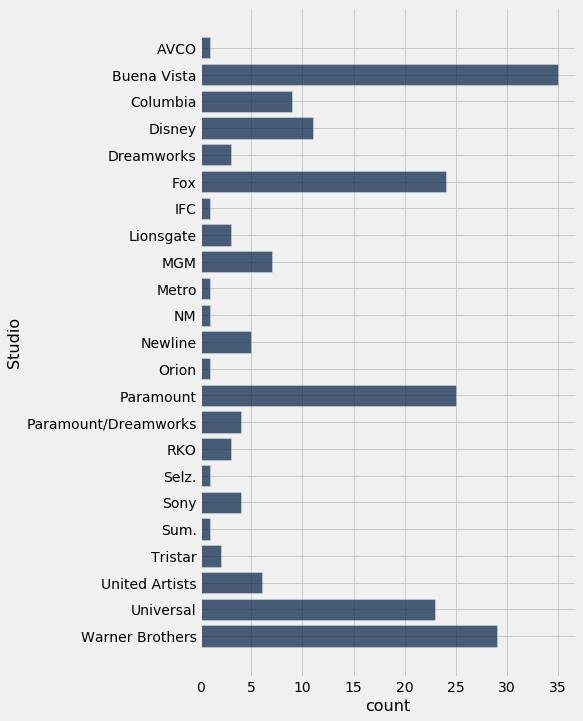

In [9]:
studio_distribution.barh('Studio')

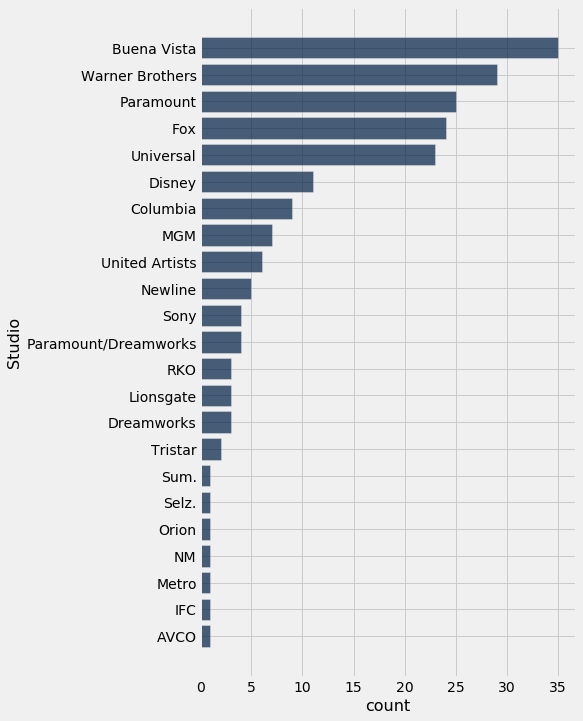

In [10]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [11]:
ages = 2019 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [12]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,80
Star Wars,Fox,460998007,1583483200,1977,42
The Sound of Music,Fox,158671368,1266072700,1965,54
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,37
Titanic,Paramount,658672302,1204368000,1997,22
The Ten Commandments,Paramount,65500000,1164590000,1956,63
Jaws,Universal,260000000,1138620700,1975,44
Doctor Zhivago,MGM,111721910,1103564200,1965,54
The Exorcist,Warner Brothers,232906145,983226600,1973,46
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,82


## Binning ##

In [13]:
min(ages), max(ages)

(2, 98)

In [14]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [15]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [16]:
sum(binned_data.column('Age count'))

200

In [17]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,91
25,67
50,35
75,7
100,0


In [18]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,91
25,68
50,0


In [19]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,50


## Histograms ##

In [20]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [21]:
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [22]:
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [23]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


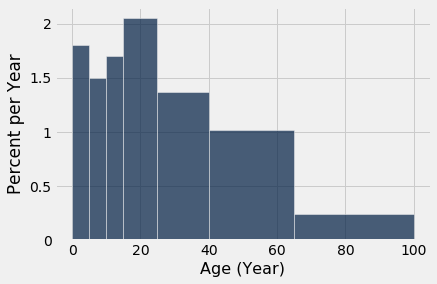

In [24]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

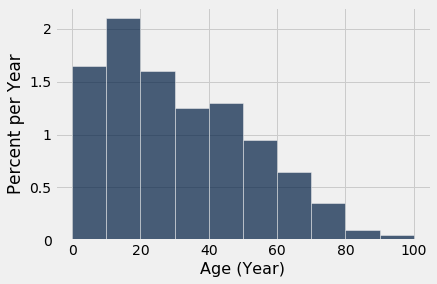

In [25]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

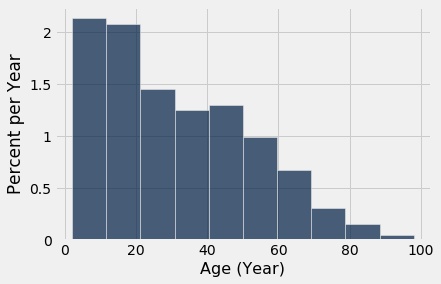

In [26]:
top_movies.hist('Age', unit='Year')

## Height ##

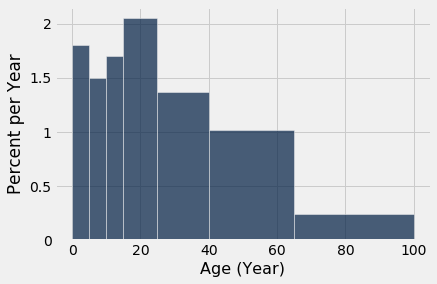

In [27]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [28]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


In [32]:
# 25.5% of movies are in the [40, 65) bin

percent = binned_data.where('bin', 40).column('Percent').item(0)

In [34]:
# The width of the 40-65 bin

width = 65 - 40

In [35]:
# Area of rectangle = height * width

height = percent / width
height

1.02

In [36]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


In [38]:
binned_data.num_rows

8

In [37]:
widths = np.diff(binned_data.column('bin'))
len(widths)

7

In [39]:
bin_lefts = np.arange(binned_data.num_rows - 1)
binned_data = binned_data.take(bin_lefts)

In [ ]:
bin_heights = binned_data.column('Percent') / widths
binned_data = binned_data.with_column('Height', bin_heights)

In [40]:
binned_data

bin,Age count,Percent,Height
0,18,9,1.8
5,15,7.5,1.5
10,17,8.5,1.7
15,41,20.5,2.05
25,41,20.5,1.36667
40,51,25.5,1.02
65,17,8.5,0.242857


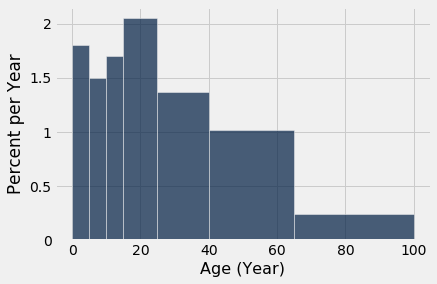

In [41]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')